In [1]:
import pandas as pd
import datetime
from datetime import timedelta
import time
import matplotlib.pyplot as plt

In [2]:
def eplustimestamp(simdata):
    timestampdict={}
    for i,row in simdata.T.iteritems():
        timestamp = str(2013) + ' ' + row['Date/Time']
        try:
            timestampdict[i] = datetime.datetime.strptime(timestamp,'%Y %m/%d  %H:%M:%S')
        except ValueError:
            tempts = timestamp.replace(' 24', ' 23')
            timestampdict[i] = datetime.datetime.strptime(tempts,'%Y %m/%d  %H:%M:%S')
            timestampdict[i] += timedelta(hours=1)
    timestampseries = pd.Series(timestampdict)
    return timestampseries

In [3]:
OUTPUT_DIRECTORY = "G:\\My Drive\\presentations\\CMU\\12770 - Autonomous Sustainable Buildings From Theory to Practice\\Chapter 10 - Building Energy Simulations\\material\\"
OUTPUT_FILE = OUTPUT_DIRECTORY + "My First EnergyPlus.csv"
SimulationData = pd.read_csv(OUTPUT_FILE)
SimulationData.index = eplustimestamp(SimulationData)
Zone_1_Heating_Load_Without_Control_System = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Rate [W](TimeStep)'])
Zone_1_Cooling_Load_Without_Control_System = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](TimeStep)'])

C:\Users\miguelmartin\AppData\Local\Temp\ipykernel_12076\4029831062.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,row in simdata.T.iteritems():


In [7]:
OUTPUT_FILE = OUTPUT_DIRECTORY + "My First EnergyPlus with Control System.csv"
SimulationData = pd.read_csv(OUTPUT_FILE)
SimulationData.index = eplustimestamp(SimulationData)
Zone_1_Heating_Load_With_Control_System = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Rate [W](TimeStep)'])
Zone_1_Cooling_Load_With_Control_System = pd.Series(index = SimulationData.index, data = SimulationData['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](TimeStep)'])

C:\Users\miguelmartin\AppData\Local\Temp\ipykernel_12076\4029831062.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,row in simdata.T.iteritems():


(0.0, 9000000.0)

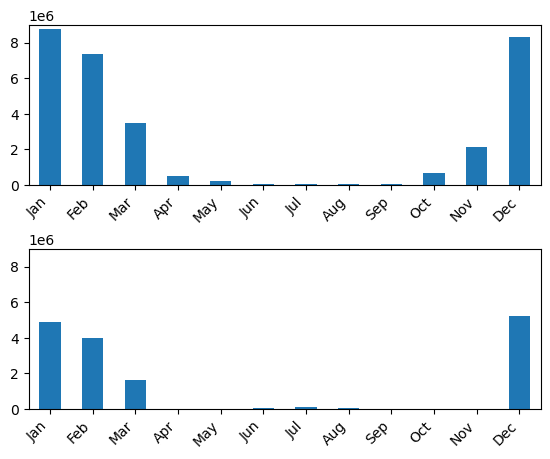

In [8]:
fig, axes = plt.subplots(2)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
Zone_1_Heating_Load_Without_Control_System.resample('M').sum().plot(kind='bar', ax=axes[0])
Zone_1_Heating_Load_With_Control_System.resample('M').sum().plot(kind='bar', ax=axes[1])
months = [month.strftime('%b') for month in Zone_1_Heating_Load_Without_Control_System.resample('M').sum().index]
axes[0].set_xticklabels(months, rotation=45, ha='right')
axes[1].set_xticklabels(months, rotation=45, ha='right')
axes[0].set_xlim([-0.5, 11.5])
axes[1].set_xlim([-0.5, 11.5])
axes[0].set_ylim([0, 9e6])
axes[1].set_ylim([0, 9e6])

(0.0, 9000000.0)

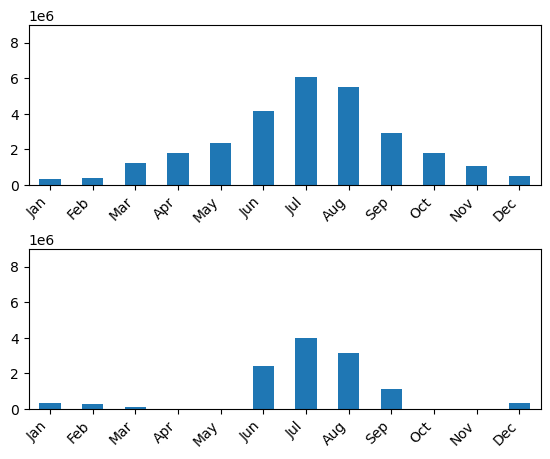

In [9]:
fig, axes = plt.subplots(2)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
Zone_1_Cooling_Load_Without_Control_System.resample('M').sum().plot(kind='bar', ax=axes[0])
Zone_1_Cooling_Load_With_Control_System.resample('M').sum().plot(kind='bar', ax=axes[1])
months = [month.strftime('%b') for month in Zone_1_Cooling_Load_Without_Control_System.resample('M').sum().index]
axes[0].set_xticklabels(months, rotation=45, ha='right')
axes[1].set_xticklabels(months, rotation=45, ha='right')
axes[0].set_xlim([-0.5, 11.5])
axes[1].set_xlim([-0.5, 11.5])
axes[0].set_ylim([0, 9e6])
axes[1].set_ylim([0, 9e6])